In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [4]:
#get dataset
mnist = tf.keras.datasets.mnist

In [18]:
#load dataset
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [19]:
X_train_full.shape

(60000, 28, 28)

In [20]:
y_train_full.shape

(60000,)

In [21]:
X_test.shape

(10000, 28, 28)

In [22]:
y_test.shape

(10000,)

In [23]:
img = X_train_full[0]
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

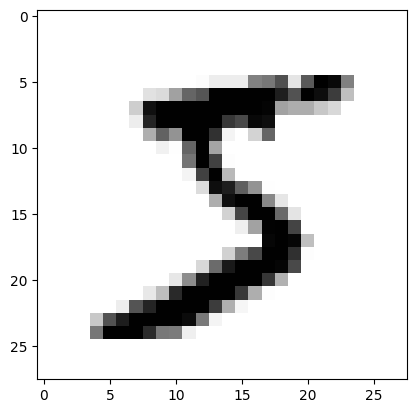

In [24]:
plt.imshow(img, cmap='binary')

In [14]:
y_train[0]

5

<Axes: >

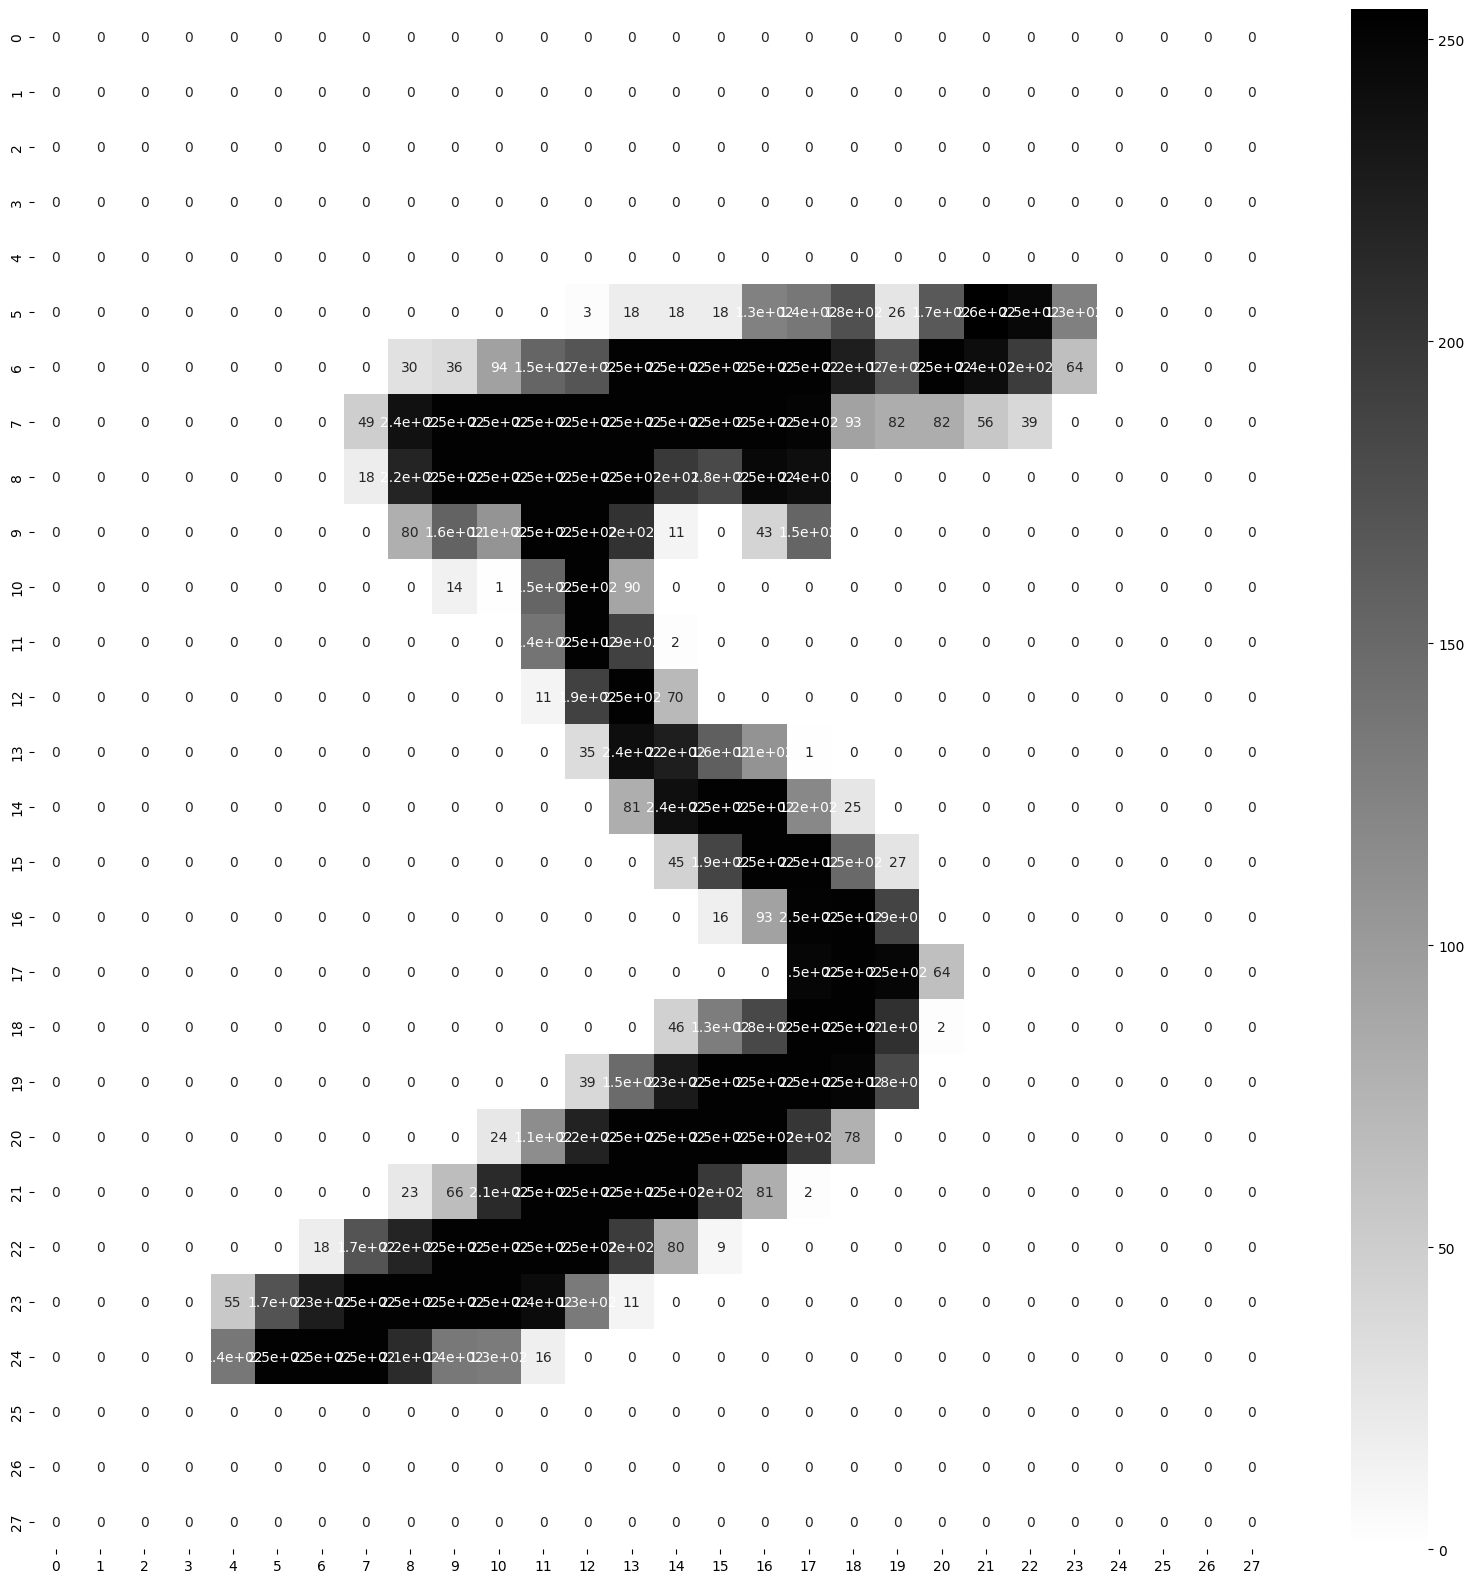

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(img,cmap='binary',annot=True)  #value ranges between 0 to 255

In [26]:
#splitting validatation data & divided by 255 for scale down value ranges betwwen 0 to 255
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test/255

In [27]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [28]:
#to find totaly how many classes present
len(np.unique(y_train))

10

In [30]:
classes = len(np.unique(y_train))
classes

10

In [31]:
layers = [
    tf.keras.layers.Flatten(input_shape=(28,28), name='inputLayer'),
    tf.keras.layers.Dense(300, activation='relu', name='hiddenLayer01'),
    tf.keras.layers.Dense(100, activation='relu', name='hiddenLayer02'),
    tf.keras.layers.Dense(classes, activation='softmax', name='outputLayer')
]

In [32]:
model = tf.keras.models.Sequential(layers)

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
#hiddenlayer1 235500trainable parameter
#(input*weight)+bias
(784*300)+300

235500

In [37]:
#hiddenlayer2 trainable parameter
#(input*weight)+bias
(300*100)+100

30100

In [38]:
#output trainable parameter
#(input*weight)+bias
(100*10)+10

1010

In [39]:
#total trainable parameter
235500+30100+1010

266610

In [40]:
LOSS_FUNCTION = 'SparseCategoricalCrossentropy'
OPTIMIZER = 'SGD'
METRICS = ['accuracy']

model.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=METRICS)

In [41]:
EPOCHS = 30
VALIDATION = (X_valid, y_valid)

history = model.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION)

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.6019 - accuracy: 0.8435 - val_loss: 0.3106 - val_accuracy: 0.9132
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2872 - accuracy: 0.9179 - val_loss: 0.2432 - val_accuracy: 0.9306
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2341 - accuracy: 0.9335 - val_loss: 0.2029 - val_accuracy: 0.9438
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1999 - accuracy: 0.9424 - val_loss: 0.1764 - val_accuracy: 0.9524
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1741 - accuracy: 0.9507 - val_loss: 0.1596 - val_accuracy: 0.9564
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1540 - accuracy: 0.9564 - val_loss: 0.1438 - val_accuracy: 0.9618
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1385 - accuracy: 0.9603 - val_loss: 0.1336 - val_accuracy

In [42]:
#default batch size 32, we can change it
55000/32

1718.75

In [43]:
EPOCHS = 30
VALIDATION = (X_valid, y_valid)
BATCH = 16

history = model.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION,batch_size=BATCH)

Epoch 1/30
3438/3438 [==============================] - 17s 5ms/step - loss: 0.0298 - accuracy: 0.9925 - val_loss: 0.0682 - val_accuracy: 0.9800
Epoch 2/30
3438/3438 [==============================] - 12s 4ms/step - loss: 0.0270 - accuracy: 0.9935 - val_loss: 0.0728 - val_accuracy: 0.9772
Epoch 3/30
3438/3438 [==============================] - 11s 3ms/step - loss: 0.0241 - accuracy: 0.9946 - val_loss: 0.0699 - val_accuracy: 0.9792
Epoch 4/30
3438/3438 [==============================] - 12s 3ms/step - loss: 0.0217 - accuracy: 0.9950 - val_loss: 0.0691 - val_accuracy: 0.9798
Epoch 5/30
3438/3438 [==============================] - 12s 4ms/step - loss: 0.0197 - accuracy: 0.9960 - val_loss: 0.0676 - val_accuracy: 0.9804
Epoch 6/30
3438/3438 [==============================] - 12s 4ms/step - loss: 0.0174 - accuracy: 0.9968 - val_loss: 0.0805 - val_accuracy: 0.9766
Epoch 7/30
3438/3438 [==============================] - 13s 4ms/step - loss: 0.0156 - accuracy: 0.9972 - val_loss: 0.0672 - val_ac

In [44]:
history.history

{'loss': [0.029836811125278473,
  0.027043459936976433,
  0.024146096780896187,
  0.021655138581991196,
  0.019690396264195442,
  0.017402030527591705,
  0.015605847351253033,
  0.014191864989697933,
  0.012674191035330296,
  0.011722276918590069,
  0.010399652644991875,
  0.00963988434523344,
  0.008708824403584003,
  0.007987581193447113,
  0.007227866444736719,
  0.006741284858435392,
  0.006133699323982,
  0.005633724853396416,
  0.005194478668272495,
  0.004833281505852938,
  0.004518465138971806,
  0.00417323550209403,
  0.003931813407689333,
  0.00360938161611557,
  0.0034376748371869326,
  0.003239421406760812,
  0.003048688406124711,
  0.002870486816391349,
  0.0027233350556343794,
  0.0025973443407565355],
 'accuracy': [0.9924727082252502,
  0.9935454726219177,
  0.9945818185806274,
  0.9949818253517151,
  0.9959818124771118,
  0.9968000054359436,
  0.9972181916236877,
  0.9976727366447449,
  0.998090922832489,
  0.9983636140823364,
  0.9988909363746643,
  0.9989454746246338,

In [45]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.029837,0.992473,0.068248,0.9800
1,0.027043,0.993545,0.072849,0.9772
2,0.024146,0.994582,0.069902,0.9792
3,0.021655,0.994982,0.069110,0.9798
4,0.019690,0.995982,0.067582,0.9804
5,0.017402,0.996800,0.080509,0.9766
6,0.015606,0.997218,0.067177,0.9812
7,0.014192,0.997673,0.066163,0.9810
8,0.012674,0.998091,0.069599,0.9806
9,0.011722,0.998364,0.066015,0.9816


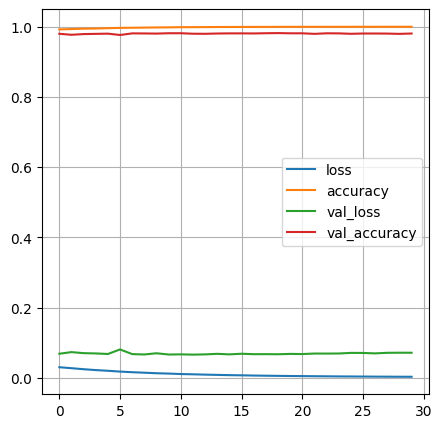

In [49]:
pd.DataFrame(history.history).plot(figsize=(5,5))
plt.grid(True)
plt.show()

In [50]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0736 - accuracy: 0.9810


[0.07358214259147644, 0.9810000061988831]

In [52]:
(10000/32) #10000data, 32batchsize

312.5

In [53]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [54]:
#checking for new data point
X_new = X_test[:3]
y_prob = model.predict(X_new)
y_prob         #this returns probability value because we used softmat

1/1 [==============================] - 0s 163ms/step


array([[4.5036841e-10, 2.4228453e-10, 2.5921819e-08, 4.9144460e-06,
        1.5255051e-12, 8.5776455e-11, 2.3795133e-16, 9.9999511e-01,
        2.2865258e-10, 1.3857468e-08],
       [2.3456623e-10, 4.2305703e-07, 9.9999952e-01, 3.6164302e-08,
        2.0357084e-18, 2.4604073e-12, 1.7876814e-10, 1.0259988e-19,
        2.8800418e-09, 1.1872314e-20],
       [7.4272052e-08, 9.9981695e-01, 6.6638722e-06, 2.5478577e-08,
        2.8148492e-05, 9.6216297e-07, 2.7495801e-07, 1.2279692e-05,
        1.3461283e-04, 4.4472692e-08]], dtype=float32)

In [55]:
#checking for new data point
X_new = X_test[:3]
y_prob = model.predict(X_new)
y_prob.round(3)

1/1 [==============================] - 0s 34ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

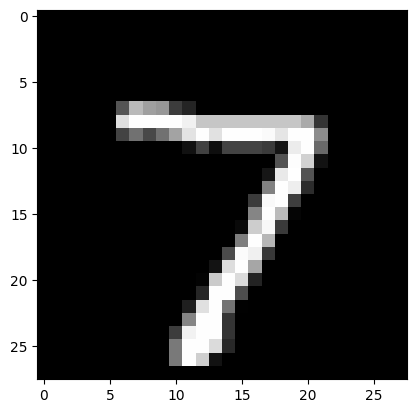

In [56]:
#checking for x_new first value
plt.imshow(X_new[0], cmap='gray')

my model predicted first output correctly

In [58]:
y_pred = np.argmax(y_prob, axis=-1)
y_pred

array([7, 2, 1])

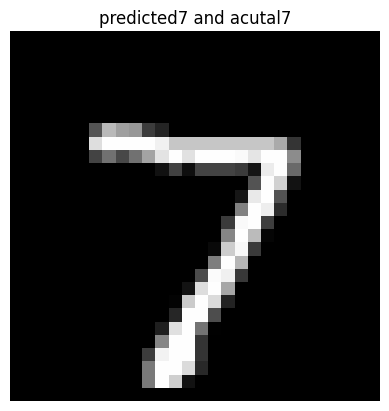

------------------------------------------------------------


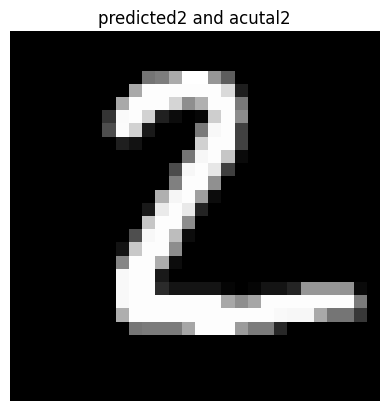

------------------------------------------------------------


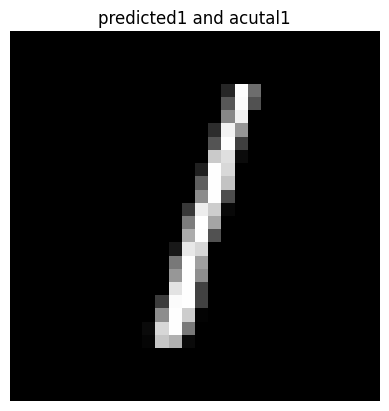

------------------------------------------------------------


In [64]:
for img_array,pred,actual in zip(X_new, y_pred, y_test[:3]):
  plt.imshow(img_array, cmap='gray')
  plt.title(f'predicted{pred} and acutal{actual}')
  plt.axis('off')
  plt.show()
  print('--'*30)
